In [1]:
from dfLoader import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import argparse
import torch
from evalModel import printClassAccuracy
from dfLoader import classes
import torch.nn as nn
from sklearn.datasets import load_iris  # Replace this with your own dataset
t2np = lambda t: t.detach().cpu().numpy()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


/home/jingyuan/miniconda3/envs/mlp/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (None)/charset_normalizer (3.0.1) doesn't match a supported version!
  warnings.warn(


In [2]:
from autoEncoder import ConvAutoencoder, DSModel

 
inputChannel = 1
latent_size = 512
linEval = True

model = ConvAutoencoder(inputChannel, latent_size)
model.load_state_dict(torch.load(f'models/Autoencoder.pth'))
model.to(device)

# DSmodel = DSModel(model,18, latent_size, linEval).to(device)

ConvAutoencoder(
  (encoder): ResNet_18(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Block(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
      )
      (1): Block(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), st

In [3]:
dataset = torch.load('datasets/Test_dataSet.pt')
X = dataset.tensors[0]
y = dataset.tensors[1]

In [33]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
#     axs.set_title(title or "Spectrogram (db)")
#     axs.set_ylabel(ylabel)
#     axs.set_xlabel("frame")
    im = axs.imshow(spec, origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
#     fig.colorbar(im, ax=axs)
    fig.set_size_inches(3, 10)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'{title}.png', dpi=150)
    plt.show(block=False)
    


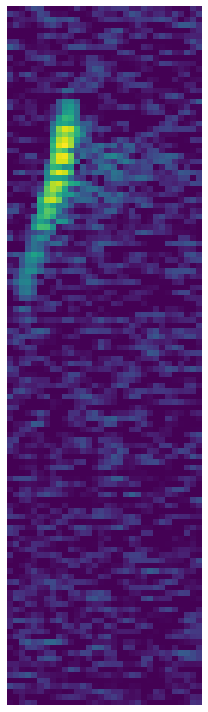

In [34]:
plot_spectrogram(X[300], title = "input")

In [11]:
X_new = model(X[300].view(-1,1,128,32).to(device))


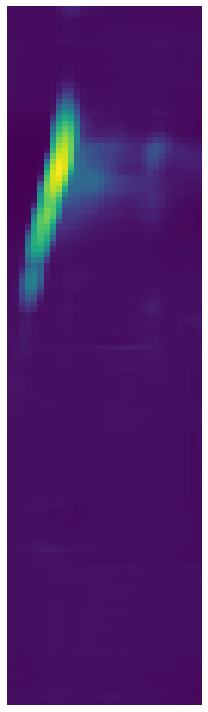

In [35]:
plot_spectrogram(t2np(X_new.view(128,32)), title = "reconstructed")